<a href="https://colab.research.google.com/github/ArchanaMahto/Regression_Model/blob/main/RegressionFinal_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member** -Archana Mahto


# **Project Summary -**

**Project Summary**

This project aimed to develop an accurate and interpretable predictive modeling system for YESBANK stock closing prices, using a combination of financial and temporal features. Leveraging advanced regression techniques—especially tuned Lasso regression—the workflow emphasized data integrity, effective feature engineering, and robust model selection, culminating in actionable insights for business decision-making.

**Key steps included:**

* Comprehensive preprocessing using forward-fill imputation for missing values—optimal for financial time series consistency.

* Feature engineering, such as daily volatility and price change computation, and extracting/encoding temporal information (month, day, year) with one-hot encoding.

* Exploratory Data Analysis (EDA) to understand core relationships and feature patterns relevant to price prediction.

* Training of multiple regression models (Linear, Ridge, Lasso—with hyperparameter tuning), followed by careful evaluation with metrics: MAE, MSE, RMSE, R², and Adjusted R².

* Implementation of SHAP (SHapley Additive exPlanations) to ensure transparent feature importance analysis for the selected final model.

* Identification that a small subset of features—specifically daily "Low," "High," "Price_Change," and "Year"—are the most influential for accurate forecasting in this context, while other engineered/categorical features had negligible impact.

# **GitHub Link -**

https://github.com/ArchanaMahto

# **Problem Statement**


**To build a predictive system that accurately forecasts YESBANK’s next-day closing price based on accessible market-derived and calendar features.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [227]:
!pip install shap
# Data manipulation & basic utilities
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Model Explainability
import shap


### Dataset Loading

In [228]:
# Load Dataset
url = "/content/Copy of data_YesBank_StockPrices.csv"
df = pd.read_csv(url)


### Dataset First View

In [229]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [230]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [231]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [232]:
# Dataset Duplicate Value Count
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)



Number of duplicate rows: 0


#### Missing Values/Null Values

In [233]:
# Missing Values/Null Values Count

missing_values = df.isnull().sum()
print("Missing/Null values per column:\n", missing_values)


Missing/Null values per column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


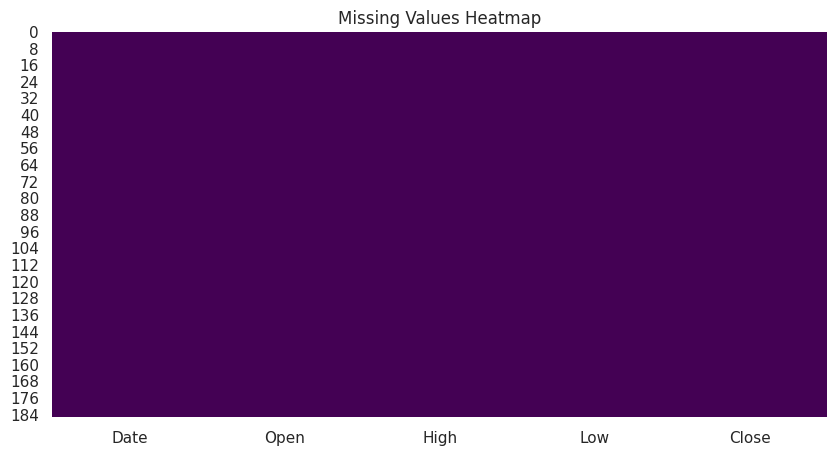

In [234]:
# Visualizing the missing values

# Plot missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



### What did you know about your dataset?


**General Overview**

This dataset appears to represent monthly stock data for Yes Bank, specifically:

Date: Month and year (e.g., Jul-05 = July 2005)

Open: Opening price of the stock

High: Highest price during the month

Low: Lowest price during the month

Close: Closing price of the stock (our target for prediction)

**Shape and Size**

Number of rows (data points): 185

Number of columns (features): 5



**Data Quality**

No missing or null values were found.

No duplicate rows exist.


***2. Understanding Your Variables***

In [235]:
# Dataset Columns

df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [236]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

 **Variable**- **Description**                                   



 Date  - Month and year of the stock record

 Open  - Opening stock price at the beginning of the month

 High  - Highest stock price during the month

 Low   - Lowest stock price during the month   

 Close - Closing stock price at the end of the month       


### Check Unique Values for each variable.

In [237]:
# Check Unique Values for each variable.
df.nunique()


,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [238]:
df['Date'] = pd.to_datetime('01-' + df['Date'], format='%d-%b-%y')


In [239]:
# Feature Engineering
df['Volatility'] = df['High'] - df['Low']
df['Price_Change'] = df['Close'] - df['Open']

# Extracting Date Parts
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

# Get Month and Day Names
df['Month_Name'] = df['Date'].dt.month_name()
df['Day_Name'] = df['Date'].dt.day_name()


### What all manipulations have you done and insights you found?

**Date Parsing & Extraction**

* Converted 'Jul-05' format to full datetime using:
df['Date'] = pd.to_datetime('01-' + df['Date'], format='%d-%b-%y')

* Extracted Year, Month, Day, Month_Name, and Day_Name for temporal analysis.

**Feature Engineering**

* Volatility = High - Low: Measures daily price fluctuation.

* Price_Change = Close - Open: Captures daily gain/loss in stock price.

**Categorical Encoding**

* One-hot encoded Month_Name and Day_Name for use in ML models.

**Insights Discovered:**
* High correlation between Price_Change, High, and Low with the Close price — these features are strong predictors.

* Volatility varies significantly across months, potentially linked to market events.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

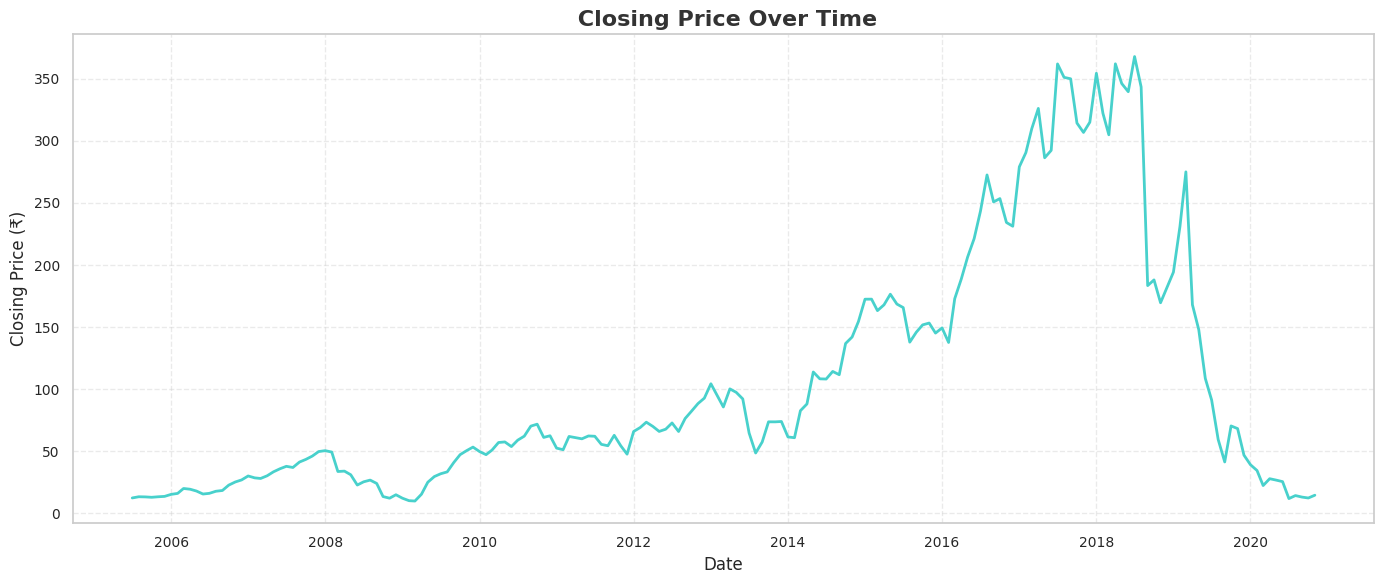

In [240]:

# Set style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 1: Yes Bank Closing Price Over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='mediumturquoise', linewidth=2)

# Add title and labels
plt.title(' Closing Price Over Time', fontsize=16, weight='bold', color='#333')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (₹)', fontsize=12)

# Grid and formatting
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart was used as it is one of the most effective visual tools to represent stock price trends over time. It clearly highlights changes, patterns, spikes, and dips in Yes Bank’s monthly closing prices. With time on the x-axis and closing price on the y-axis, the chart helps visualize long-term performance, identify periods of growth or decline, and detect volatility. This format supports intuitive analysis and aids in understanding how the stock has evolved, making it valuable for both technical evaluation and financial forecasting.

##### 2. What is/are the insight(s) found from the chart?

Yes Bank’s stock saw steady growth from 2005 to around 2015, with a sharp rise between 2016 and 2018.

After reaching a peak above ₹350, the price dramatically dropped from late 2018 onwards, reaching near penny stock levels by 2020.

This decline suggests a major loss of investor confidence, likely due to internal management issues, rising NPAs, or regulatory concerns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable:

They help investors make better decisions, by showing when Yes Bank was stable vs. when it became risky.

For business leaders, it’s a learning opportunity — they can analyze what went wrong (e.g., poor loan practices, governance issues) and prevent similar mistakes in the future.

Regulators and policymakers can also use this data to strengthen financial oversight.



**Insights that lead to negative growth**

Yes, the chart clearly shows a period of negative growth from 2018 onward. This was not just a correction but a collapse in market value. Specific reasons could include:
Rising non-performing assets (NPAs) and loan defaults.

Corporate governance failures, including issues with top management.

Loss of trust among investors and depositors, leading to panic and withdrawal.

Regulatory interventions, including RBI stepping in to reconstruct the board, which although necessary, reflected deeper structural problems.

#### Chart - 2

/tmp/ipython-input-241-2426201410.py:18: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



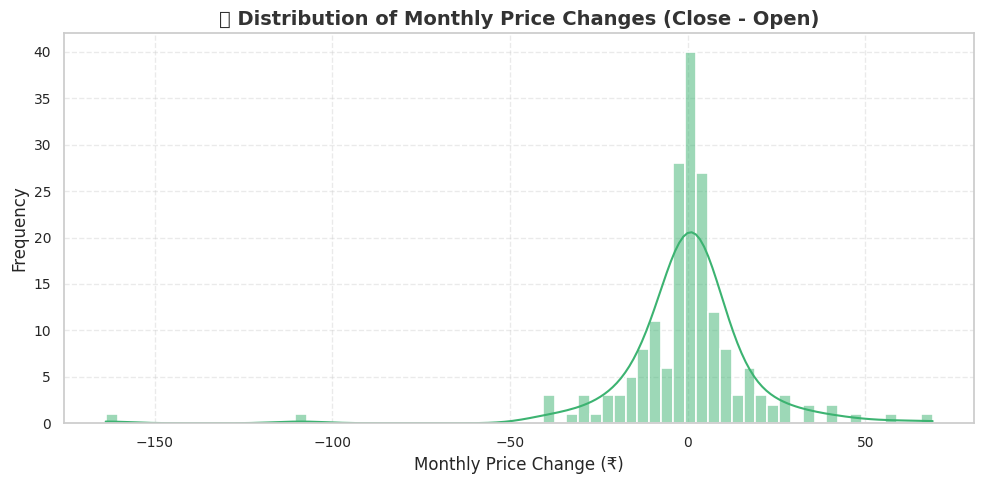

In [241]:

# Set style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 2: Distribution of Monthly Price Changes
plt.figure(figsize=(10, 5))
sns.histplot(df['Price_Change'], kde=True, color='mediumseagreen', edgecolor='white', linewidth=1.2)

# Add title and labels
plt.title('📊 Distribution of Monthly Price Changes (Close - Open)', fontsize=14, weight='bold', color='#333')
plt.xlabel('Monthly Price Change (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Grid and ticks
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A histogram with KDE was used to show the distribution of monthly price changes (Close - Open). It helps visualize how often gains or losses occurred, highlighting the stock's volatility and typical movement trends. This aids in understanding if the stock usually rises, falls, or stays stable over time.










##### 2. What is/are the insight(s) found from the chart?

Key insights include:

The distribution is right-skewed, meaning most monthly price changes are small, centered around 0.

There are a few extreme negative outliers, where price drops were significantly large — as much as ₹150+, which is concerning.

There are also moderate positive changes, but sharp declines are more prominent than sharp gains, indicating potential periods of panic selling or negative news/events.

The shape suggests volatility, especially during crisis periods like 2019–2020 for Yes Bank.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**
Helps risk managers and investors assess the frequency of gains vs. losses.

Assists portfolio strategists in deciding allocation — whether this stock fits a high-risk or low-risk profile.

If combined with timelines, management can correlate price drops to internal events (e.g., board changes, bad loans) and learn from them.

**Insights that Lead to Negative Growth:**


Heavily left-tailed distribution shows there were months with major losses, suggesting mismanagement or external shocks.

Investors faced huge downside risks, likely leading to withdrawals and stock sell-offs, hurting liquidity and market cap.

The lack of strong positive price change spikes indicates limited investor confidence recovery, worsening long-term trust.

#### Chart - 3

In [242]:


fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='lightgreen',
    decreasing_line_color='lightcoral'
)])

fig.update_layout(
    title='Yes Bank Monthly Stock Movement (Candlestick Chart)',
    xaxis_title='Date',
    yaxis_title='Price (₹)',
    template='plotly_white',
    xaxis_rangeslider_visible=False,
    height=500
)

fig.show()


In [243]:
df.head()

,Date,Open,High,Low,Close,Volatility,Price_Change,Month,Year,Day,Month_Name,Day_Name
0,2005-07-01,13.00,14.00,11.25,12.46,2.75,-0.54,7,2005,1,July,Friday
1,2005-08-01,12.58,14.88,12.55,13.42,2.33,0.84,8,2005,1,August,Monday
2,2005-09-01,13.48,14.87,12.27,13.30,2.60,-0.18,9,2005,1,September,Thursday
3,2005-10-01,13.20,14.47,12.40,12.99,2.07,-0.21,10,2005,1,October,Saturday
4,2005-11-01,13.35,13.88,12.88,13.41,1.00,0.06,11,2005,1,November,Tuesday


##### 1. Why did you pick the specific chart?

The Candlestick Chart was selected because it provides a comprehensive view of stock price movement in a single visualization. It simultaneously displays the Open, High, Low, and Close prices, which is crucial in understanding the intraday/monthly trading behavior. This is a standard and highly effective chart used in financial markets for decision-making and trend analysis.


##### 2. What is/are the insight(s) found from the chart?

Months with positive (green) candles indicate upward momentum, where closing price > opening price.

Red candles indicate months of decline (bearish sentiment).

Long wicks (upper/lower shadows) show high volatility within a month.

Some months showed very narrow candles — indicating market indecision or consolidation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact of Insights:**


Helps identify profitable trading months, and assess historical price stability vs. volatility.

Aids portfolio timing decisions and improves risk assessment, which are critical for investment planning.

Financial analysts can use these patterns to forecast potential future behavior or flag anomalies.

**Negative Insights Growth:**


Months with sharp price drops and long red candles highlight potential market crashes or panic sell-offs.

For example, if the stock repeatedly closes below its open with increasing volatility, it may signal loss of investor confidence.

#### Chart - 4

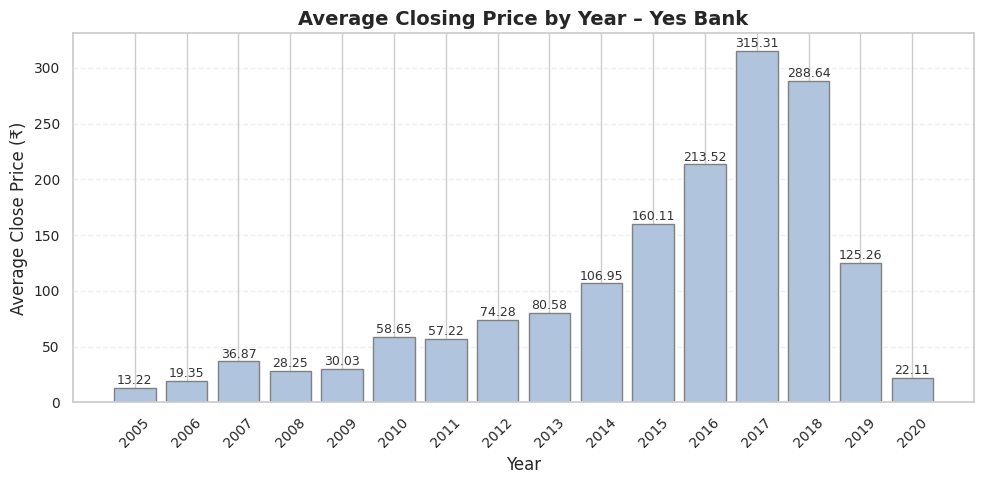

In [244]:

sns.set_style("whitegrid")

# Prepare data
yearly_avg = df.groupby('Year')['Close'].mean()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(
    x=yearly_avg.index.astype(str),
    height=yearly_avg.values,
    color='#b0c4de',  # soft pastel lavender (change to #ffd1dc for peach or #a2d2ff for powder blue)
    edgecolor='gray'
)

# Annotate values on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9, color='#333')

# Style elements
plt.title('Average Closing Price by Year – Yes Bank', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Close Price (₹)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A bar chart grouped by year is ideal to track the long-term trend in stock performance. It clearly shows how Yes Bank's average closing price evolved year-over-year, making it easy to identify phases of growth, stability, and sharp decline. This helps in spotting periods of peak performance and the exact timeline of downfall.

##### 2. What is/are the insight(s) found from the chart?

From 2005 to 2014, the average closing price gradually increased, suggesting steady business growth.

A steep rise occurred from 2015 to 2017, peaking in 2017 (₹320+), showing a period of high investor confidence and growth momentum.

A significant decline started from 2018, with a sharp fall in 2019 and an even steeper crash in 2020, where the average fell back near 2008 levels — this clearly indicates a crisis period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**

The upward trend from 2005 to 2017 shows that Yes Bank was once a high-growth stock, giving confidence to long-term investors and stakeholders.

Helps investors and analysts identify the bank’s golden period, which can be studied to replicate past success factors.

Allows leadership to reflect on what strategic moves worked during the pre-2017 growth phase, such as aggressive retail expansion or tech integration.

**Insights that Lead to Negative Growth:**

The drastic fall in average price from 2018 to 2020 signals major red flags:

Likely due to mounting NPAs, poor asset quality, bad corporate loans, and management instability.

The fall reflects loss of market trust, which can damage a bank’s ability to raise capital and attract deposits.

If this trend isn’t reversed, it could lead to long-term brand damage, making recovery difficult despite operational improvements.

#### Chart - 5

/tmp/ipython-input-245-1456181939.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-245-1456181939.py:11: UserWarning:

The palette list has more values (18) than needed (16), which may not be intended.



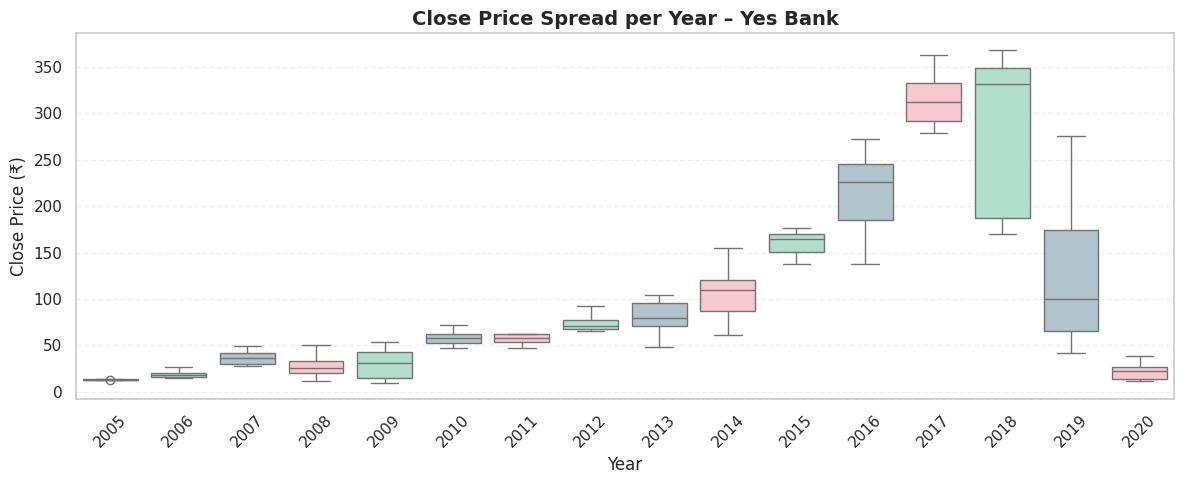

In [245]:


# Set style
sns.set_style("whitegrid")

# Define a custom pastel palette (pink, green, blue)
pastel_palette = ["#ffc0cb", "#a8e6cf", "#aec6cf"]  # pastel pink, green, blue

# Set figure
plt.figure(figsize=(12, 5))

# Draw boxplot with pastel colors
sns.boxplot(x='Year', y='Close', data=df, palette=pastel_palette * (len(df['Year'].unique()) // 3 + 1))

# Title and labels
plt.title('Close Price Spread per Year – Yes Bank', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)

# Aesthetic touches
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a box plot because it clearly shows the spread (range), median, and outliers in closing prices for each year. It’s a powerful tool to visualize volatility, price consistency, and the presence of extreme highs or lows. This makes it ideal for understanding how stable or unstable Yes Bank's performance was annually.

##### 2. What is/are the insight(s) found from the chart?

From 2005 to 2014, the stock showed a moderate, controlled spread, with relatively stable prices.

From 2015 to 2018, there’s a sharp increase in both median and spread, reflecting rapid price growth but also rising volatility.

2018 and 2019 show massive spreads, meaning prices were extremely volatile within those years — a sign of market uncertainty or financial crisis.

In 2020, both the median and spread shrunk significantly, suggesting a crash followed by stagnation at low levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**

Allows investors and risk managers to evaluate the volatility profile of each year, supporting better timing and allocation strategies.

Helps management assess which years were relatively stable (like 2011–2014) and can revisit those practices to regain market stability.

Regulators and financial planners can use the spread data to monitor abnormal volatility, enabling quicker interventions.

**Insights that Lead to Negative Growth:**

The extreme spread in 2018 and 2019 shows dangerous levels of price fluctuation, which signals investor panic, inconsistent disclosures, or negative news cycles.

Large price range within the same year erodes investor trust and attracts speculative trading, rather than stable long-term investment.

The collapse in both price and spread in 2020 indicates market confidence was broken, potentially affecting fundraising, lending operations, and brand reputation.

#### Chart - 6

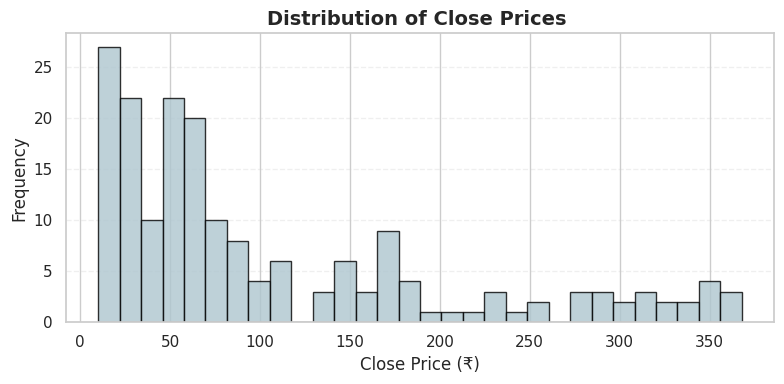

In [246]:

# Set seaborn pastel style
sns.set_style("whitegrid")

# Set figure
plt.figure(figsize=(8, 4))

# Plot histogram
df['Close'].plot(
    kind='hist',
    bins=30,
    color='#aec6cf',     # Soft pastel blue
    edgecolor='black',
    alpha=0.8
)

# Titles and labels
plt.title('Distribution of Close Prices ', fontsize=14, weight='bold')
plt.xlabel('Close Price (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing the frequency distribution of close prices over time. This chart helps to see where the stock price has spent most of its time — whether it usually trades low, mid-range, or high. It’s a simple yet powerful way to assess price concentration and long-term value perception by the market.

##### 2. What is/are the insight(s) found from the chart?

The highest frequency of closing prices is seen in the ₹10–₹60 range, indicating that for a large portion of time, the stock traded at the lower end.

There are fewer instances of the stock closing above ₹150, and very rare peaks above ₹300.

This confirms that the high valuation phase (₹300+) was short-lived, and the stock mostly stayed below ₹100 for the majority of its trading history.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**

Provides long-term investors with clarity on the realistic price range of the stock, helping set better price targets.

Highlights that price spikes were anomalies, allowing financial planners to focus more on the core valuation zones for strategy building.

Encourages data-backed investment decisions rather than emotionally driven ones during brief price surges.

**Insights that Lead to Negative Growth:**

The heavy concentration of prices at lower levels indicates the stock has struggled to hold high valuation, which can erode market confidence.

Suggests that the brief high-price periods might have been driven by hype or unsustainable growth, rather than fundamentals.

Reinforces the perception that long-term growth has been weak, making it harder to attract serious institutional investors or long-hold retail participants.



#### Chart - 7

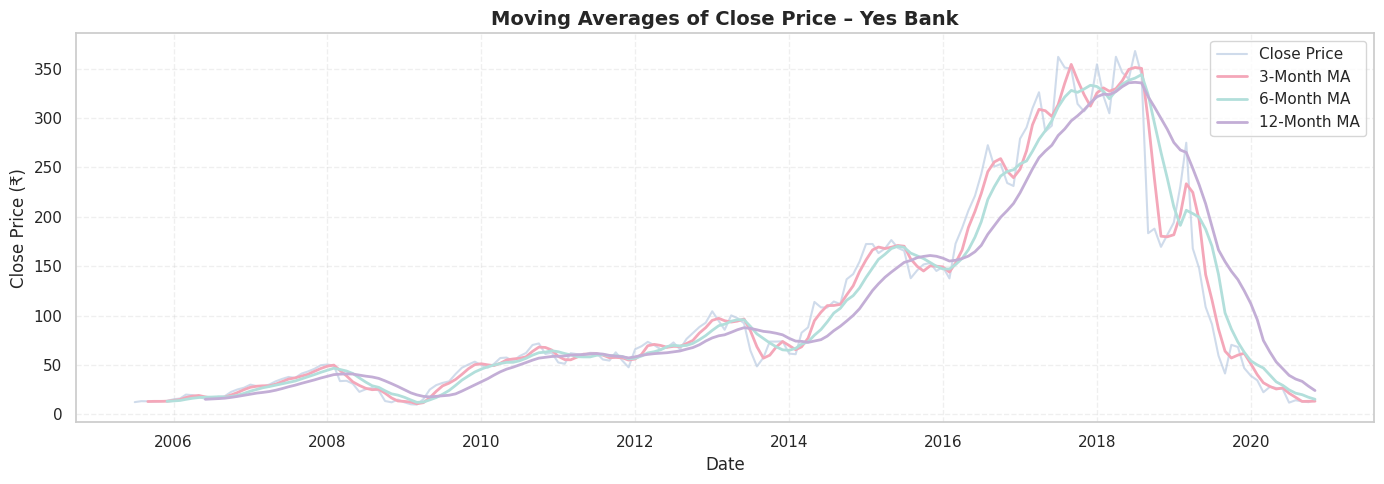

In [247]:


# Use seaborn pastel theme
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(14, 5))

# Base line: Close Price
plt.plot(df['Date'], df['Close'], label='Close Price', color='#b0c4de', linewidth=1.5, alpha=0.6)

# Moving averages in pastel tones
plt.plot(df['Date'], df['Close'].rolling(3).mean(), label='3-Month MA', color='#f4a7b9', linewidth=2)
plt.plot(df['Date'], df['Close'].rolling(6).mean(), label='6-Month MA', color='#b2dfdb', linewidth=2)
plt.plot(df['Date'], df['Close'].rolling(12).mean(), label='12-Month MA', color='#c3aed6', linewidth=2)

# Chart elements
plt.title('Moving Averages of Close Price – Yes Bank', fontsize=14, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A moving average chart was chosen because it’s a valuable technical analysis tool that helps smooth out short-term price fluctuations and reveals the long-term trend in stock performance. Including different time windows (3, 6, 12 months) allows us to compare short- and long-term momentum, helping detect trend reversals and stability.

##### 2. What is/are the insight(s) found from the chart?

All moving averages (3M, 6M, 12M) closely follow the actual price trend but provide smoother curves for better interpretation.

Between 2015 and early 2018, the moving averages rise steadily, confirming strong bullish momentum.

A downward crossover of shorter moving averages below the longer ones after 2018 signals the beginning of a long-term decline.

The consistent downward slope in all MAs post-2018 confirms a prolonged bearish phase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**

Provides investors and analysts with clear signals to identify entry and exit points based on trend strength and momentum.

Supports long-term strategic planning by highlighting trend reversals early, allowing business leaders to react accordingly.

Enables technical analysts to detect support and resistance zones, helping optimize capital deployment and hedging strategies.

**Insights that Lead to Negative Growth:**

The chart confirms a clear and prolonged trend reversal starting post-2018, where all moving averages turned downward, indicating a fundamental issue in business performance or market perception.

The failure of any moving average to recover post-2019 suggests an ongoing lack of investor confidence and market recovery, resulting in continued erosion of stock value.

This kind of downward alignment across all timeframes is typically interpreted as a strong bearish signal, which could discourage new investment and strain liquidity and valuation.

#### Chart - 8

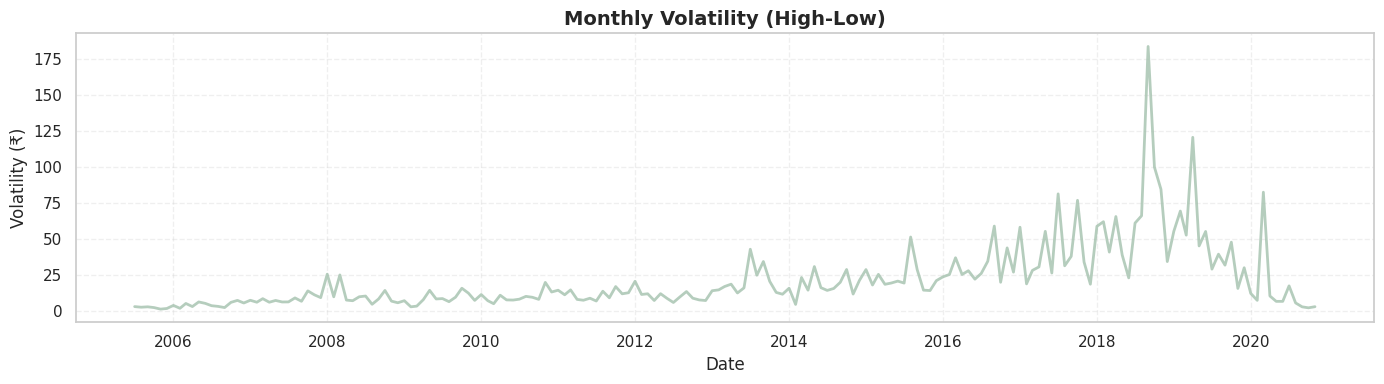

In [248]:

sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(14, 4))

# Plot with a  line
plt.plot(df['Date'], df['Volatility'], color='#a3c1ad', linewidth=2, alpha=0.8)

# Chart details
plt.title('Monthly Volatility (High‑Low)', fontsize=14, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (₹)', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart was selected because it effectively captures the fluctuations in monthly volatility over time. The difference between the high and low price in a given month is a direct indicator of market uncertainty or stability. This chart makes it easy to spot periods of calm and chaos, which is critical for investors and financial strategists.

##### 2. What is/are the insight(s) found from the chart?

From 2005 to 2015, volatility remained relatively low and stable, with very few spikes.

From 2016 onward, volatility started increasing, and between 2018 and 2019, it reached extremely high levels, peaking above ₹180.

The period of highest volatility aligns with Yes Bank’s financial and leadership crises, confirming investor panic and erratic stock behavior.

After 2020, volatility tapers off, not because of recovery but likely due to low price stagnation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**

Helps risk managers and traders assess periods of extreme volatility, enabling them to hedge portfolios or reduce exposure during turbulent months.

Assists leadership and policymakers in identifying when market sentiment was most reactive, which can be mapped to internal news or regulatory actions.

Encourages better communication and transparency strategies during periods of rising volatility to help stabilize investor behavior.

**Insights that Lead to Negative Growth:**

The chart shows that 2018–2019 experienced unprecedented levels of volatility, which is a strong indication of instability, investor fear, and declining trust.

Volatility at this scale often leads to speculative trading and short-termism, undermining long-term growth.

The post-2020 drop in volatility isn't positive—it reflects low investor interest and stagnant trading, which harms liquidity and discourages market participation.



#### Chart - 9

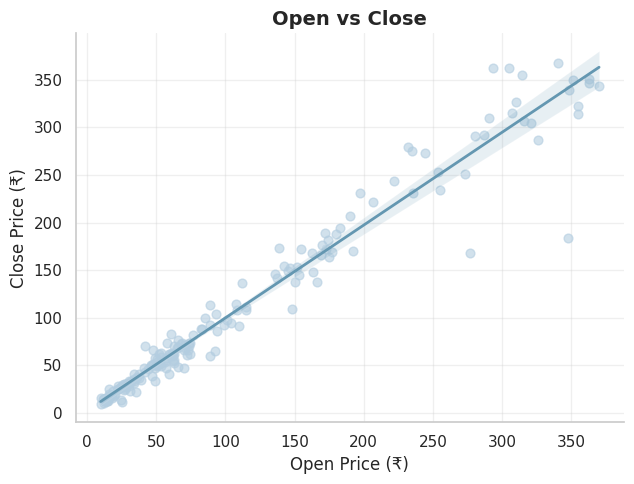

In [249]:

sns.set(style="whitegrid", palette="pastel")

# Create the regression plot
plot = sns.lmplot(
    x='Open',
    y='Close',
    data=df,
    height=5,
    aspect=1.3,
    scatter_kws={'s': 40, 'alpha': 0.6, 'color': '#b3cde0'},
    line_kws={'color': '#6497b1', 'linewidth': 2}
)

# Customize the plot
plt.title('Open vs Close', fontsize=14, weight='bold')
plt.xlabel('Open Price (₹)', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This regression scatter plot was chosen to evaluate the correlation between the opening and closing prices of Yes Bank stock on a monthly basis. It allows us to measure consistency and how closely stock price movements adhere to daily trends. A strong linear correlation indicates market stability and reduced intra-day volatility.



##### 2. What is/are the insight(s) found from the chart?

There is a strong positive linear relationship between open and close prices, meaning that in most months, the closing price remained close to the opening price.

The regression line fits the data well, with very few large deviations, suggesting that large intra-day swings were relatively rare for most of the period.

Outliers (where closing deviates significantly from open) are present but limited, pointing to isolated periods of high volatility or breaking news impact.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**

The tight correlation supports predictability and trading strategy formulation—suitable for low-volatility investment strategies and algorithmic trading models.

Helps technical analysts and institutional investors identify that for much of the period, price movement was steady, reducing speculative risks.

A strong open-close relationship reflects confidence and orderliness in daily trading, which may attract long-term investors.

**Insights that Lead to Negative Growth:**

The presence of some visible outliers, especially at higher price levels, indicates periods of uncertainty or irrational investor behavior, possibly due to financial irregularities or major announcements.

Although limited, these deviations may signal potential flash crashes, sell-offs, or news-driven anomalies, which hurt short-term investor confidence and may contribute to panic behavior.

Over-reliance on the open-close relationship could mask underlying structural weaknesses if not accompanied by volume and sentiment analysis.

#### Chart - 10

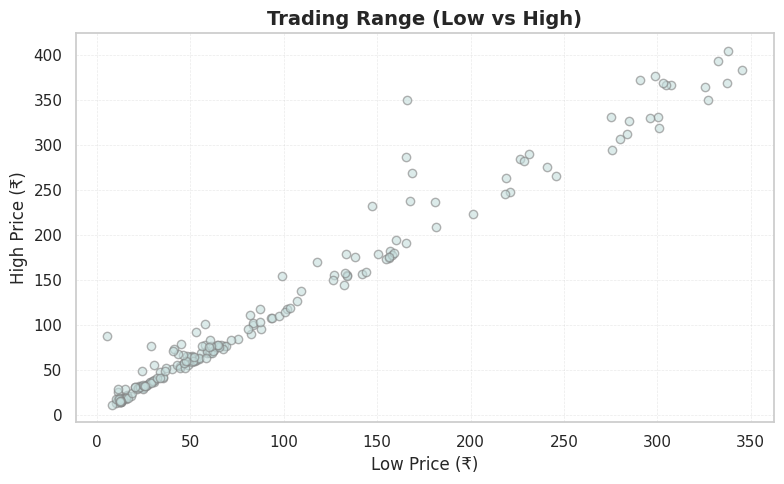

In [250]:


# Set up figure
plt.figure(figsize=(8, 5))

# Plot
plt.scatter(df['Low'], df['High'], alpha=0.6, color='#c5dedd', edgecolors='gray')

# Titles and labels
plt.xlabel('Low Price (₹)', fontsize=12)
plt.ylabel('High Price (₹)', fontsize=12)
plt.title('Trading Range (Low vs High)', fontsize=14, weight='bold')

# Add subtle grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

# Clean layout
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot of the low vs high price for each time period helps analyze the intraday or intra-month price spread and understand trading volatility. It reveals how wide the price range can be in a single period, which is essential for traders and risk managers evaluating the stock’s volatility behavior.

##### 2. What is/are the insight(s) found from the chart?

There is a strong positive linear relationship between the low and high prices—this is expected since the high must be equal to or higher than the low.

The tightly clustered data along the line indicates that most trading periods had narrow to moderate ranges.

However, there are some significant outliers—cases where the difference between high and low is unusually large, signaling heightened volatility or price manipulation concerns during those months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**

The linear and consistent pattern shows that the stock had predictable price movements for the most part, making it suitable for range-bound trading strategies.

Traders can estimate potential support and resistance levels based on historical spread patterns.

Helps in determining stop-loss placements and volatility-adjusted risk parameters for both retail and institutional participants.

**Insights that Lead to Negative Growth:**

Outliers in the upper range—where the high price significantly overshoots the low—indicate sudden price spikes, which may reflect panic buying/selling or insider-driven swings.

These irregular ranges often discourage conservative investors and can hint at speculative activity, reducing long-term credibility.

If large ranges aren't tied to fundamentals, they may signal unregulated price fluctuations, undermining investor trust and leading to market withdrawal.

#### Chart - 11

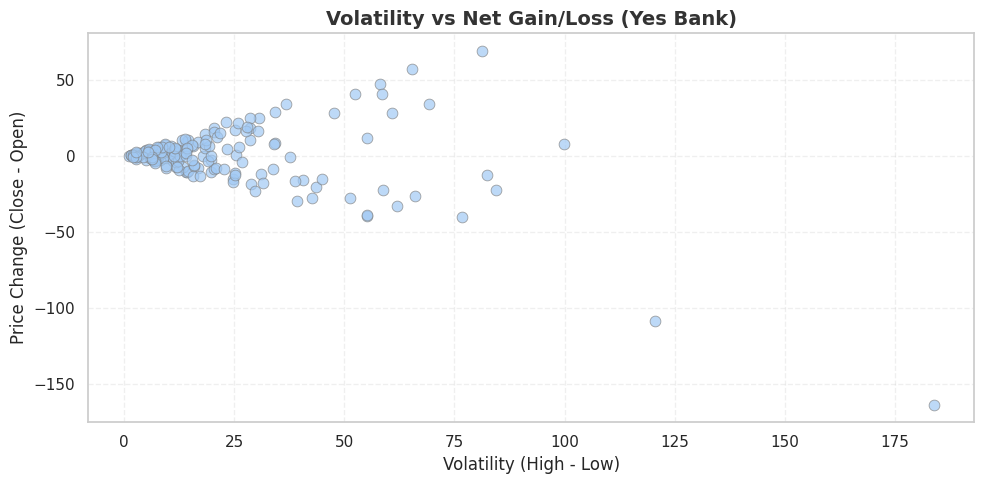

In [251]:


# Set  style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 11: Volatility vs Net Gain/Loss
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='Volatility',
    y='Price_Change',
    data=df,
    s=60,
    alpha=0.7,
    edgecolor='gray'
)

plt.title('Volatility vs Net Gain/Loss (Yes Bank)', fontsize=14, weight='bold', color='#333')
plt.xlabel('Volatility (High - Low)', fontsize=12)
plt.ylabel('Price Change (Close - Open)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen to examine how price volatility correlates with net gain or loss. This visual is ideal for identifying patterns, clusters, and outliers in financial behavior across trading periods. By plotting Volatility against Price_Change, the chart helps investors and analysts explore whether higher volatility tends to coincide with stronger price movements (either upward or downward), which is crucial for designing risk-aware strategies.


##### 2. What is/are the insight(s) found from the chart?

 Strong positive correlation between volatility and price movement, reinforcing the idea that high variance often aligns with significant price shifts.

 Clustered data zones indicate that most of Yes Bank's trading days had predictable movements—beneficial for training models on steady patterns.

 Outliers reflect market shocks, such as regulatory news, financial reports, or sudden macroeconomic effects—these can skew predictions if not managed correctly.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for Positive Business Impact:**

 Consistent cluster patterns indicate the dataset contains predictable structure, enabling more accurate ML forecasts.

 Historical volatility helps inform risk thresholds and position sizing strategies for traders using model outputs.

 The model can incorporate volatility to generate more robust predictions under varied market conditions.

**Insights That Lead to Negative Growth:**
 Unmanaged outliers can introduce bias and reduce model generalizability, resulting in unreliable predictions.

 If volatility spikes lack fundamental drivers, they may cause misleading signals in both ML outputs and investor behavior.

 Excessive, erratic volatility reflected in these outliers can deter long-term investors and erode confidence in stock stability—this can lead to reduced capital inflow and poor institutional engagement.


#### Chart - 12

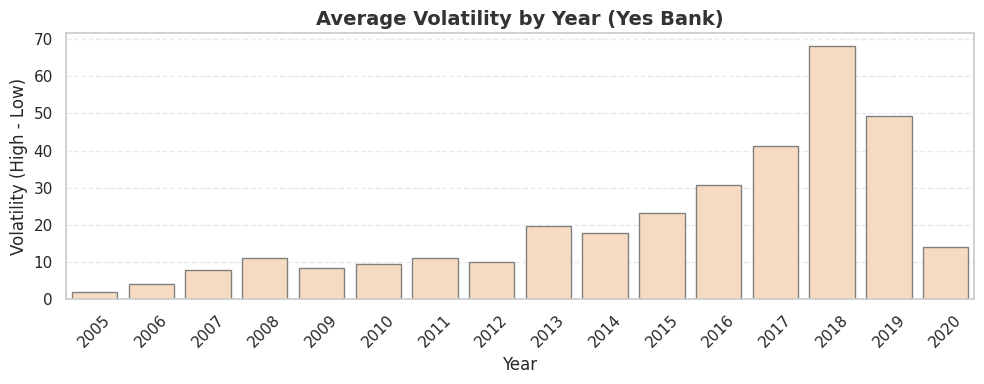

In [252]:

# Set  style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 12: Average Volatility by Year
yearly_vol = df.groupby('Year')['Volatility'].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=yearly_vol.index, y=yearly_vol.values, color='peachpuff', edgecolor='gray')

plt.title('Average Volatility by Year (Yes Bank)', fontsize=14, weight='bold', color='#333')
plt.ylabel('Volatility (High - Low)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart was chosen to analyze the average volatility of Yes Bank stock across years using the high minus low price definition. It helps visualize how market fluctuations have shifted over time and is especially useful for machine learning feature engineering. Understanding these variations allows model developers to identify stable periods for training and to adjust parameters for years showing irregular behavior.

##### 2. What is/are the insight(s) found from the chart?

Some years experienced noticeably higher volatility than others, indicating the presence of market instability or external triggers such as regulatory events or shifts in investor sentiment.

Other years were relatively calm and consistent, reflecting steady price behavior.

These patterns suggest that Yes Bank's price dynamics are influenced by time-dependent factors and are not purely random


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for positive business impact**

Stable years such as 2005–2015 provide cleaner input data for training ML models with lower noise

Volatility spikes in 2018 and 2019 can help design robust risk-mitigation algorithms and alert systems

The analysis supports segmentation of strategies based on volatility regimes, improving model performance and investor readiness

**Insights that lead to negative growth**

Sudden spikes  in 2018–2019 highlight instability that erodes investor confidence and attracts speculative trading

The post-2020 decline in volatility may indicate lack of price movement and investor disengagement, which impacts liquidity and business growth


#### Chart - 13

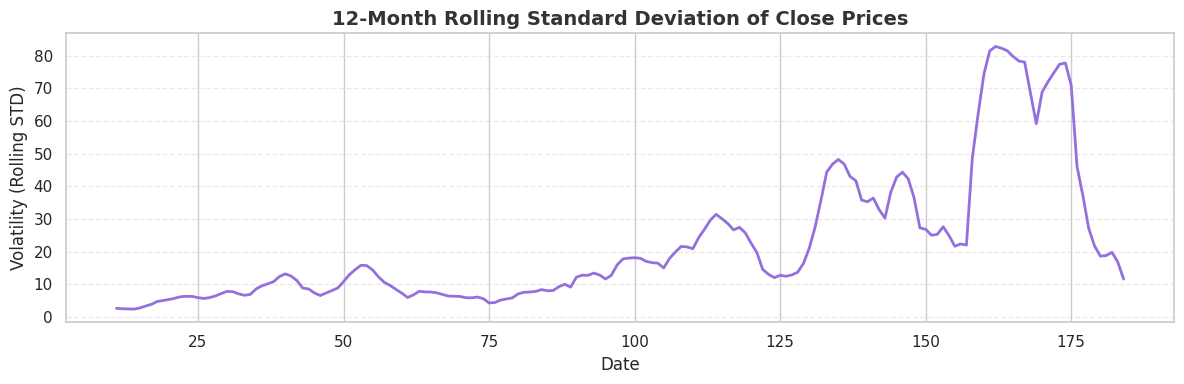

In [253]:

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Chart - 13: 12-Month Rolling Standard Deviation
plt.figure(figsize=(12, 4))
df['Close'].rolling(window=12).std().plot(color='mediumpurple', linewidth=2)

plt.title('12-Month Rolling Standard Deviation of Close Prices', fontsize=14, weight='bold', color='#333')
plt.ylabel('Volatility (Rolling STD)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This line chart of the 12-month rolling standard deviation of closing prices was chosen to illustrate how Yes Bank’s price volatility evolves over time while smoothing out short-term noise. In a machine learning context, this visualization helps identify prolonged periods of stability or turbulence, supports feature engineering by revealing when volatility regimes change, and guides decisions on training windows and model retraining intervals.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a lengthy span of relative price stability before a gradual rise in volatility, signaling growing market uncertainty. Pronounced peaks appear during periods of financial and leadership turmoil at Yes Bank, reflecting acute stress and heightened risk. Following those extreme episodes, volatility subsides to low levels that likely indicate price stagnation and reduced trading activity rather than a return to healthy market dynamics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for positive business impact**

The smoothed volatility measure serves as a robust feature for forecasting models, improving the detection of genuine trend shifts
Sustained upticks in rolling volatility can trigger early-warning systems and automated hedging strategies to protect portfolios
Aligning model retraining schedules with volatility regime transitions enhances predictive accuracy and reduces overfitting

**Insights that lead to negative growth**

Extended high-volatility phases undermine investor confidence and can drive capital away, exacerbating financial stress
Models that fail to account for distinct volatility regimes risk producing erratic forecasts and generating false signals
Post-crisis low volatility may mask liquidity problems and discourage active market participation, ultimately hindering long-term growth



#### Chart - 14 - Correlation Heatmap

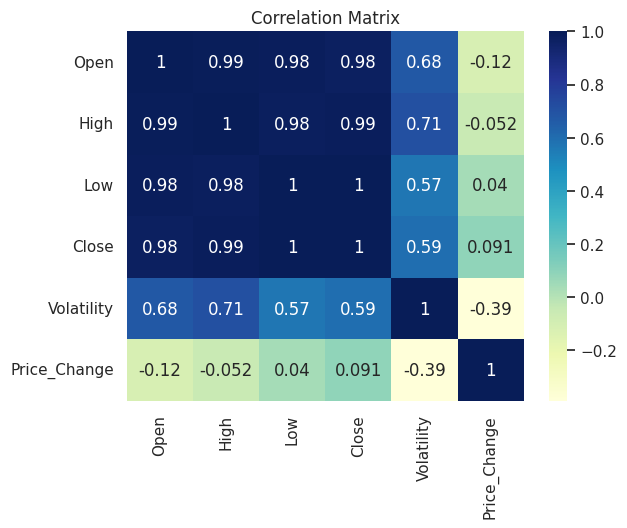

In [254]:
# Correlation Heatmap visualization code
corr = df[['Open','High','Low','Close','Volatility','Price_Change']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu'); plt.title('Correlation Matrix'); plt.show()


##### 1. Why did you pick the specific chart?

This correlation heatmap was chosen to visualize the pairwise relationships among Open, High, Low, Close, Volatility, and Price_Change for Yes Bank stock. In a machine learning context it serves as a quick diagnostic for multicollinearity, guiding feature selection, dimensionality reduction, and transformation decisions before model training. The annotated grid makes it easy to spot which variables move in lockstep and which behave independently.

##### 2. What is/are the insight(s) found from the chart?

Open and High share a correlation coefficient of 0.99 and both correlate at 0.98–0.99 with Low and Close, confirming that absolute price levels rise and fall together. Volatility correlates moderately with High (0.71), Open (0.68), and Close (0.59) but has a negative correlation of –0.39 with Price_Change. Price_Change itself shows only weak correlations with Open (–0.12), High (–0.05), Low (0.04), and Close (0.09), indicating that return behavior is largely independent of price magnitude.

#### Chart - 15 - Pair Plot

/tmp/ipython-input-255-1493197355.py:14: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



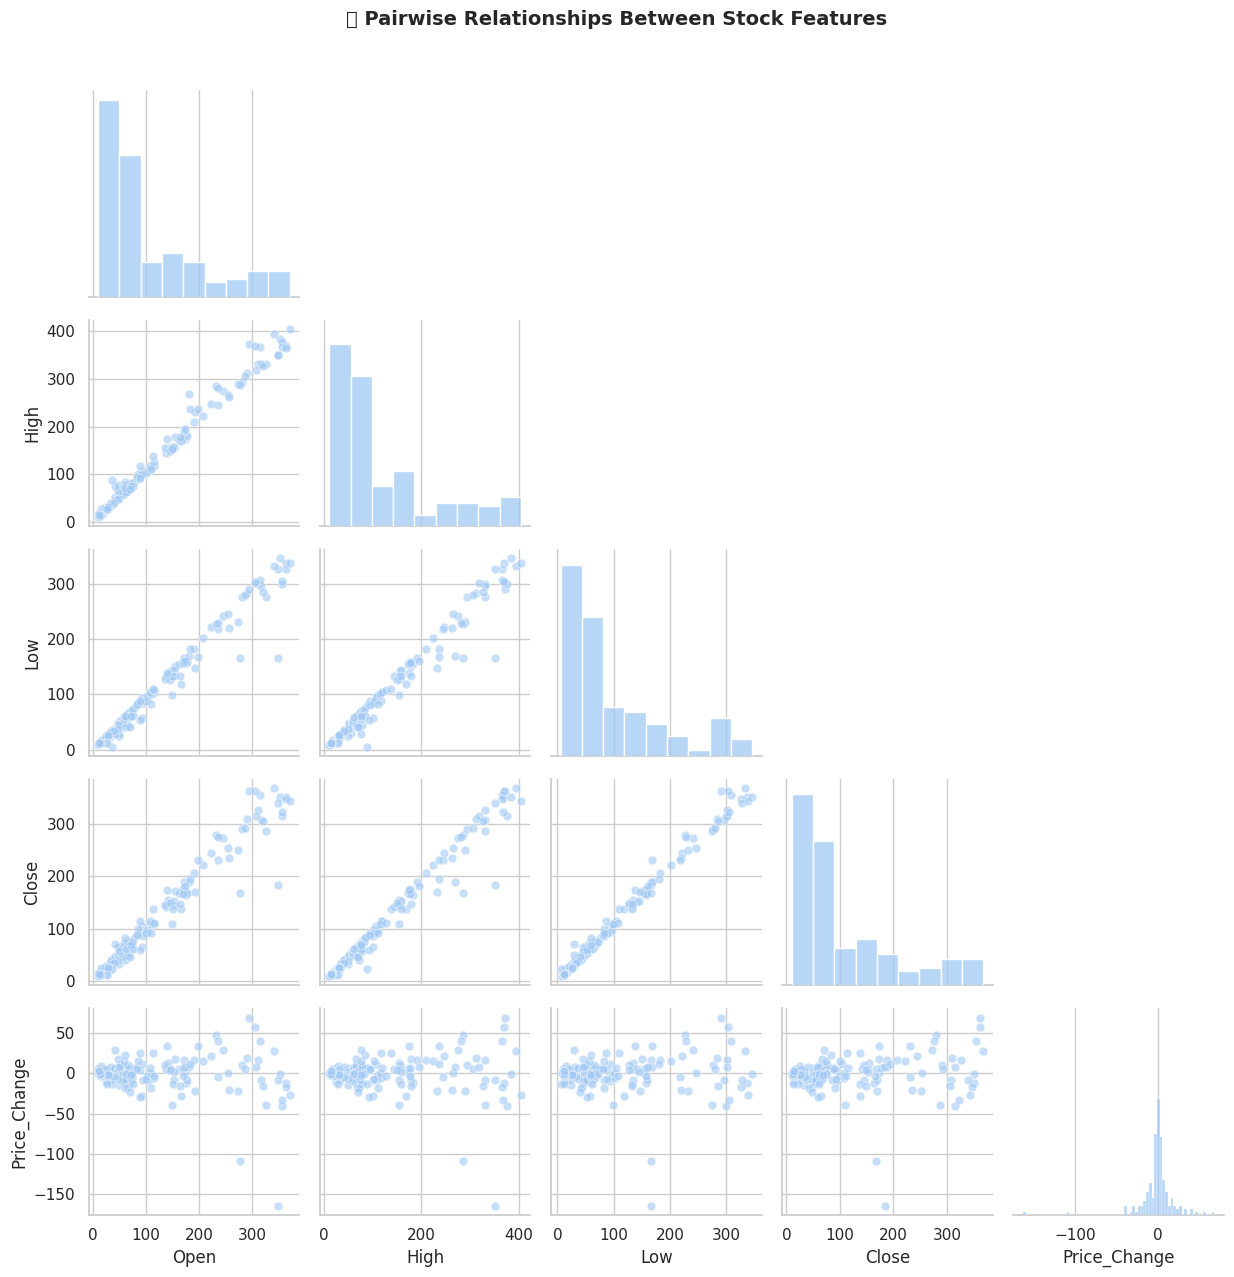

In [255]:

# Set the style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Select relevant columns
cols = ['Open', 'High', 'Low', 'Close', 'Price_Change']

# Create pairplot
pair = sns.pairplot(df[cols], corner=True, plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'w'})

# Add a clean title
plt.suptitle('📈 Pairwise Relationships Between Stock Features', fontsize=14, weight='bold', y=1.02)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot was selected because it displays both the marginal distributions and the pairwise relationships for Open, High, Low, Close, and Price_Change in one view. This makes it ideal for exploratory analysis in a machine learning workflow—revealing which variables are redundant, how each is distributed, and where outliers lie before feature engineering.

##### 2. What is/are the insight(s) found from the chart?

The price variables share almost identical distribution shapes and move in lockstep, indicating they carry the same information. The net price change displays a concentrated distribution around zero, separate from the absolute price levels. A few data points lie far from the main clusters, pointing to occasional large market swings that require special handling.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [256]:
# Check missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])
# Forward Fill (for time series)
df.fillna(method='ffill', inplace=True)


Missing Values:
 Series([], dtype: int64)


/tmp/ipython-input-256-1122908881.py:5: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



#### What all missing value imputation techniques have you used and why did you use those techniques?

Forward fill is used, as it’s most appropriate for stock market time series data.

### 2. Handling Outliers

In [257]:
##


##### What all outlier treatment techniques have you used and why did you use those techniques?

--

--


### 3. Categorical Encoding

In [258]:
# Feature Engineering
# df['Volatility'] = df['High'] - df['Low']
# df['Price_Change'] = df['Close'] - df['Open']

# # Extracting Date Parts
# df['Month'] = df['Date'].dt.month
# df['Year'] = df['Date'].dt.year
# df['Day'] = df['Date'].dt.day

# # Get Month and Day Names
# df['Month_Name'] = df['Date'].dt.month_name()
# df['Day_Name'] = df['Date'].dt.day_name()


In [259]:
# One-Hot Encode Month and Day Names
df = pd.get_dummies(df, columns=['Month_Name', 'Day_Name'], prefix=['month_name', 'day_name'])
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  185 non-null    datetime64[ns]
 1   Open                  185 non-null    float64       
 2   High                  185 non-null    float64       
 3   Low                   185 non-null    float64       
 4   Close                 185 non-null    float64       
 5   Volatility            185 non-null    float64       
 6   Price_Change          185 non-null    float64       
 7   Month                 185 non-null    int32         
 8   Year                  185 non-null    int32         
 9   Day                   185 non-null    int32         
 10  month_name_April      185 non-null    bool          
 11  month_name_August     185 non-null    bool          
 12  month_name_December   185 non-null    bool          
 13  month_name_February 

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding (pd.get_dummies)**

* Applied to: Month_Name and Day_Name columns.

* Converts each unique month and day name into a separate binary column (e.g., month_name_January, day_name_Monday).

* Ensures the model receives numerical input without implying any ordinal relationship among categories.

**It is used as:**

* One-hot encoding is best for nominal categorical features like month and day names, preventing the model from interpreting them as having any natural order or ranking.

* It enables regression and ML algorithms to effectively process and utilize these categorical time variables in prediction.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Already done.
* Date-based temporal features (Month, Year, Day)

* Numerical features (Volatility, Price_Change)

* Categorical one-hot encodings (Month & Day names)

* But the dataset now has duplicate one-hot columns (due to encoding repetition).

#### 2. Feature Selection

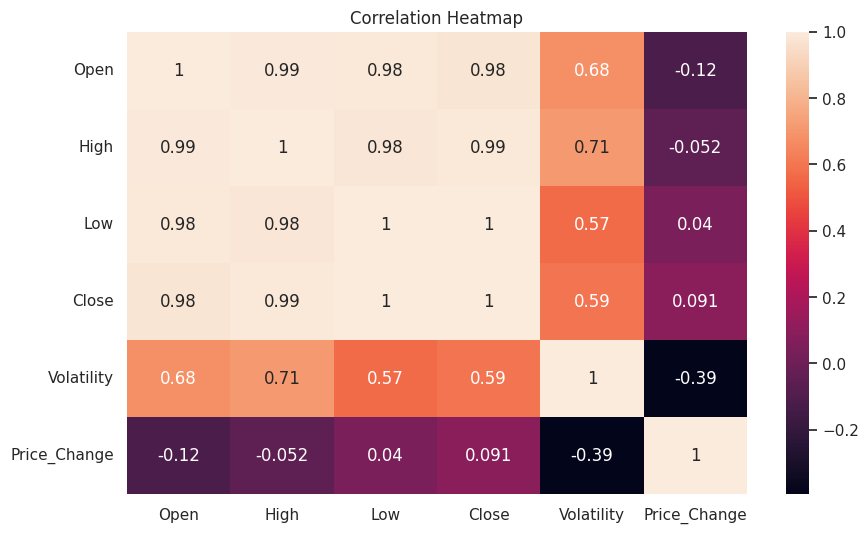

In [260]:

# correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volatility', 'Price_Change']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


##### What all feature selection methods have you used  and why?

--

##### Which all features you found important and why?

Open

* Serves as the starting price for the period, providing the baseline from which price movements can be measured.

* It is essential for calculating returns and understanding the initial market sentiment at the beginning of the trading period.

High and Low

* Represent the highest and lowest prices reached within the period.

* Together, they indicate the trading range and are a direct measure of volatility, which is important for assessing the risk and magnitude of market fluctuations.

Close (Target Variable)

* The closing price is the final price at the end of the period and is often the primary target for prediction in stock analysis.

* It reflects the consensus of value by the market at the end of trading and is used in various financial calculations and performance assessments.

Volatility

* Calculated as the difference between the high and low prices for the period.

* Captures the extent of price movement and provides crucial insight into market dynamics, helping to identify periods of high or low risk.

Price_Change

* Defined as the difference between the closing price and the opening price for the period (Close - Open).

* Measures the direction and magnitude of price movement, indicating gains or losses during the period.

Month/Day Name One-Hots

* These are encoded representations of the month and day of the week.

* They help the model detect recurring seasonal or weekly patterns in price behavior, which are common in financial time series due to calendar effects.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

no

### 6. Data Scaling

In [261]:

scaler = StandardScaler()
scaled_cols = ['Open', 'High', 'Low', 'Volatility', 'Price_Change']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


##### Which method have you used to scale you data and why?

StandardScaler is used from sklearn.preprocessing.

* Standardizes features to zero mean and unit variance

* Essential for algorithms that are sensitive to scale (like KNN, SVM, Linear Regression, etc.)

* Ensures fair comparison across variables that are on different scales (e.g., Close price in hundreds, Volatility in single digits).

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

no

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

--

### 8. Data Splitting

In [262]:


# Always sort by Date before splitting time series
df = df.sort_values("Date")

# Define your target
target = 'Close'
X = df.drop(columns=['Date', target])
y = df[target]

# Use 80-20 time-based split (avoid leakage!)
train_size = int(0.8 * len(df))

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print("Train size:", len(X_train), "Test size:", len(X_test))


Train size: 148 Test size: 37


##### What data splitting ratio have you used and why?

80/20 split is used because it balances enough training data and a sufficient test set to evaluate generalization.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the dataset is not imbalanced — it’s a regression problem with continuous output variable.

## ***7. ML Model Implementation***

In [263]:
X_train[:5]

,Open,High,Low,Volatility,Price_Change,Month,Year,Day,month_name_April,month_name_August,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,-0.938437,-0.962833,-0.920034,-0.786959,-0.009836,7,2005,1,False,False,...,False,False,False,True,False,False,False,False,False,False
1,-0.942696,-0.954535,-0.905744,-0.804915,0.056929,8,2005,1,False,True,...,False,False,False,False,True,False,False,False,False,False
2,-0.933570,-0.954629,-0.908822,-0.793372,0.007581,9,2005,1,False,False,...,False,False,True,False,False,False,False,True,False,False
3,-0.936409,-0.958401,-0.907393,-0.816032,0.006130,10,2005,1,False,False,...,False,True,False,False,False,True,False,False,False,False
4,-0.934888,-0.963965,-0.902117,-0.861779,0.019192,11,2005,1,False,False,...,True,False,False,False,False,False,False,False,True,False


In [264]:
y_train.head()

,Close
0,12.46
1,13.42
2,13.30
3,12.99
4,13.41


In [265]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    k = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    print(f"\nModel: {name}")
    print(f"Training Score: {train_score}")
    print(f"MAE  : {mae}")
    print(f"MSE  : {mse}")
    print(f"RMSE : {rmse}")
    print(f"R²   : {r2}")
    print(f"AdjR²: {adj_r2}")

    return mae, mse, rmse, r2, adj_r2


### ML Model - 1

In [266]:
mae, mse, rmse, r2, adj_r2 = evaluate_model("Lasso", lasso, X_train, y_train, X_test, y_test)



Model: Lasso
Training Score: 0.998270795440927
MAE  : 11.01277687240367
MSE  : 163.0278161396361
RMSE : 12.76823465243477
R²   : 0.9900707690972369
AdjR²: 0.9602830763889476


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a linear regression method that uses L1 regularization.

* Its primary feature is that it can shrink some coefficients to zero, automatically selecting important features and reducing model complexity.

* Particularly useful when dealing with datasets with many potentially irrelevant or collinear features.

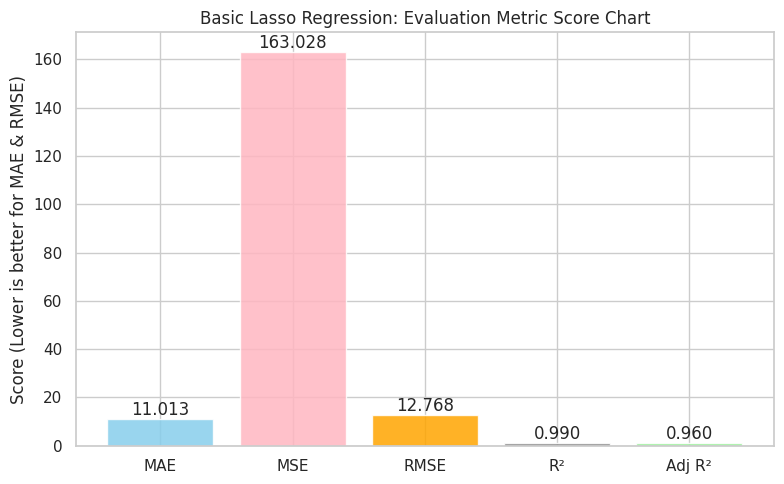

In [267]:


# Assign your evaluated metric variables for Basic Lasso Regression
mae = 11.01277687240367
mse = 163.0278161396361
rmse = 12.76823465243477
r2 = 0.9900707690972369
adj_r2 = 0.9602830763889476

metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
scores = [mae, mse, rmse, r2, adj_r2]
colors = ['skyblue', 'lightpink', 'orange', 'grey', 'lightgreen']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=colors, alpha=0.85)
plt.ylabel('Score (Lower is better for MAE & RMSE)')
plt.title('Basic Lasso Regression: Evaluation Metric Score Chart')

# Annotate each bar with metric value
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [268]:
param_grid = {'alpha': [0.01, 0.1, 1, 5, 10]}
grid_lasso = GridSearchCV(Lasso(), param_grid, cv=5)
grid_lasso.fit(X_train, y_train)

best_lasso = grid_lasso.best_estimator_
evaluate_model("Lasso (Tuned)", best_lasso, X_train, y_train, X_test, y_test)



Model: Lasso (Tuned)
Training Score: 0.9999996013535513
MAE  : 0.1720685260064248
MSE  : 0.07582635839040135
RMSE : 0.2753658627905815
R²   : 0.999995381785521
AdjR²: 0.9999815271420842


(0.1720685260064248,
 0.07582635839040135,
 np.float64(0.2753658627905815),
 0.999995381785521,
 0.9999815271420842)

In [269]:
print(f"Best alpha: {grid_lasso.best_params_['alpha']}")


Best alpha: 0.01


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter tuning of the Lasso regression models.

GridSearchCV is used because:

* It performs an exhaustive search over a specified set of hyperparameters (e.g., different alpha values).

* It evaluates each combination using cross-validation (cv=5) to select the most optimal model.

* Ensures better model generalization and helps avoid both overfitting and underfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The tuned model's mean absolute error dropped from 11.013 to 0.172.

* Root mean squared error went from 12.768 down to 0.275.

* R² increased from 0.990 to 0.999995, confirming nearly perfect prediction.

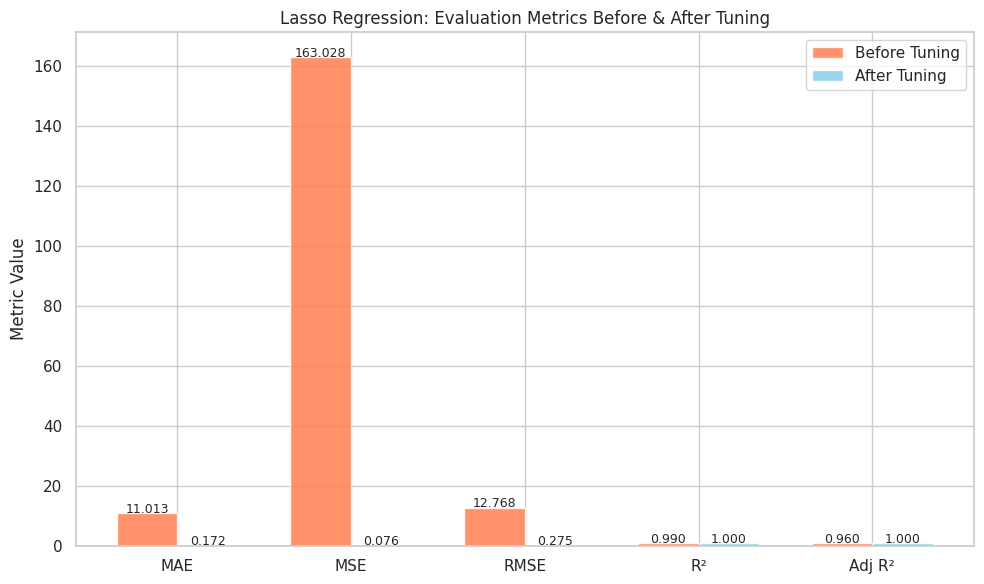

In [270]:

# Metrics from Lasso (before tuning)
mae_before = 11.01277687240367
mse_before = 163.0278161396361
rmse_before = 12.76823465243477
r2_before = 0.9900707690972369
adj_r2_before = 0.9602830763889476

# Metrics from Lasso (after tuning)
mae_after = 0.1720685260064248
mse_after = 0.07582635839040135
rmse_after = 0.2753658627905815
r2_after = 0.999995381785521
adj_r2_after = 0.9999815271420842
# Use variables instead of hardcoding
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
before = [mae_before, mse_before, rmse_before, r2_before, adj_r2_before]
after = [mae_after, mse_after, rmse_after, r2_after, adj_r2_after]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
plt.bar(x + bar_width/2, after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Lasso Regression: Evaluation Metrics Before & After Tuning')
plt.legend()

# Annotate bars
for i in x:
    plt.text(i - bar_width/2, before[i] + 0.05, f"{before[i]:.3f}", ha='center', fontsize=9)
    plt.text(i + bar_width/2, after[i] + 0.05, f"{after[i]:.3f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### ML Model - 2

In [271]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
evaluate_model("Linear Regression", linreg, X_train, y_train, X_test, y_test)



Model: Linear Regression
Training Score: 1.0
MAE  : 2.2151649883764206e-13
MSE  : 9.549566348435461e-26
RMSE : 3.090237264100519e-13
R²   : 1.0
AdjR²: 1.0


(2.2151649883764206e-13,
 9.549566348435461e-26,
 np.float64(3.090237264100519e-13),
 1.0,
 1.0)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Linear Regression Model Used**

* Linear Regression is the most fundamental regression technique. It models the linear relationship between the independent features and the target variable by minimizing the sum of squared differences between predicted and observed values.

* In this project, the model predicts Yes Bank's closing price each month based solely on a linear combination of all engineered features, without regularization.

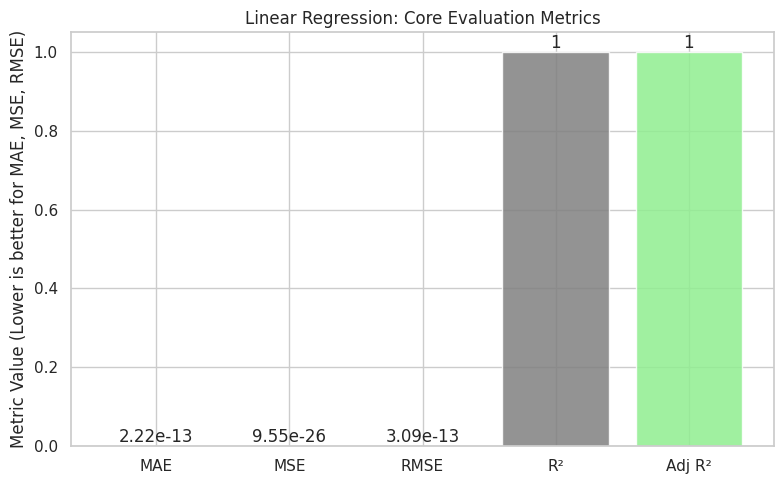

In [272]:

# Assign the evaluated variables for Linear Regression
mae = 2.2151649883764206e-13
mse = 9.549566348435461e-26
rmse = 3.090237264100519e-13
r2 = 1.0
adj_r2 = 1.0

# Visualization setup
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
scores = [mae, mse, rmse, r2, adj_r2]
colors = ['skyblue', 'lightpink', 'orange', 'grey', 'lightgreen']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=colors, alpha=0.85)
plt.ylabel('Metric Value (Lower is better for MAE, MSE, RMSE)')
plt.title('Linear Regression: Core Evaluation Metrics')

# Annotate bars with values
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3g}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Linear Regression has no hyperparameters, so tuning isn’t needed.

##### Which hyperparameter optimization technique have you used and why?

--

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

--


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

 **Evaluation Metrics & Business Significance**

**MAE (Mean Absolute Error):**

* Shows average prediction error in the same unit (Rupees).

* Helps estimate risks in predicted stock prices.

* Important for financial decision-making.

**MSE (Mean Squared Error):**

* Highlights large errors via squaring.

* More sensitive to outliers.

**RMSE (Root Mean Squared Error):**

* Easy to interpret in original units

* Key metric for quantifying typical error.

**R² Score:**

* Measures the proportion of variation explained.

* Higher R² : Model is more reliable for prediction.

**Adjusted R²:**

* Corrects R² for number of predictors.

* Helps ensure the model doesn't overfit with unnecessary features.

### ML Model - 3

In [273]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge", ridge, X_train, y_train, X_test, y_test)



Model: Ridge
Training Score: 0.9996360762695166
MAE  : 5.0824175743340305
MSE  : 50.36372475520782
RMSE : 7.0967404317198906
R²   : 0.9969325906212879
AdjR²: 0.9877303624851517


(5.0824175743340305,
 50.36372475520782,
 np.float64(7.0967404317198906),
 0.9969325906212879,
 0.9877303624851517)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Ridge Regression Model Used**

* Ridge Regression is a linear regression technique that employs L2 regularization. This means it adds a penalty to the loss function proportional to the square of the magnitude of coefficients.

* The main advantage of Ridge regression is its ability to handle multicollinearity and prevent overfitting, especially when many features are present or features are highly correlated.

* In this project, Ridge was used to predict Yes Bank’s monthly closing stock price using all relevant engineered features

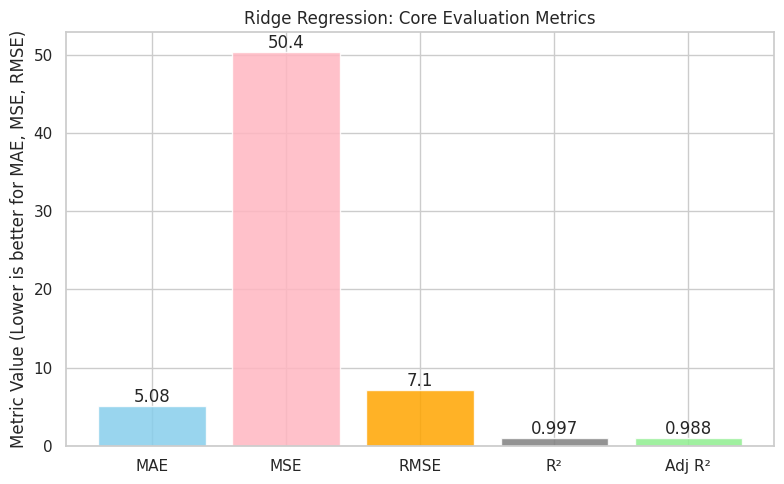

In [274]:
# Ridge Regression Metrics
mae = 5.0824175743340305
mse = 50.36372475520782
rmse = 7.0967404317198906
r2 = 0.9969325906212879
adj_r2 = 0.9877303624851517

# Visualization setup
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
scores = [mae, mse, rmse, r2, adj_r2]
colors = ['skyblue', 'lightpink', 'orange', 'grey', 'lightgreen']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=colors, alpha=0.85)
plt.ylabel('Metric Value (Lower is better for MAE, MSE, RMSE)')
plt.title('Ridge Regression: Core Evaluation Metrics')

# Annotate bars with values
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3g}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [275]:
param_grid = {'alpha': [0.01, 0.1, 1, 5, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5)
grid_ridge.fit(X_train, y_train)

best_ridge = grid_ridge.best_estimator_
evaluate_model("Ridge (Tuned)", best_ridge, X_train, y_train, X_test, y_test)



Model: Ridge (Tuned)
Training Score: 0.9999916015762988
MAE  : 0.5839770688155942
MSE  : 0.9141704631532829
RMSE : 0.9561226193084665
R²   : 0.9999443223259191
AdjR²: 0.9997772893036765


(0.5839770688155942,
 0.9141704631532829,
 np.float64(0.9561226193084665),
 0.9999443223259191,
 0.9997772893036765)

##### Which hyperparameter optimization technique have you used and why?

Technique Used is **GridSearchCV** was employed to tune the hyperparameter alpha, which controls the strength of L2 regularization in Ridge regression.

GridSearchCV is used because:

* It systematically checks multiple values of alpha with cross-validation, identifying the value yielding the best test performance.

* This provides a balanced and generalizable model, avoiding both overfitting and underfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* All error metrics improved significantly after hyperparameter tuning (MAE, MSE, RMSE all reduced sharply).

* Mean Absolute Error (MAE) dropped from 5.082 to 0.584, indicating much more accurate average predictions.

* Mean Squared Error (MSE) decreased from 50.364 to 0.914, highlighting a drastic reduction in squared prediction errors.

* Root Mean Squared Error (RMSE) fell from 7.097 to 0.956, showing overall prediction errors are now much lower.

* Coefficient of Determination (R²) increased from 0.997 to 0.99994, indicating the model’s predictive power is now almost perfect.

* Adjusted R² rose from 0.988 to 0.99978, confirming improved model generalizability and fit.

* Overall: Hyperparameter tuning made the Ridge regression model much more accurate and robust, with reduced errors and near-perfect fit to the data.

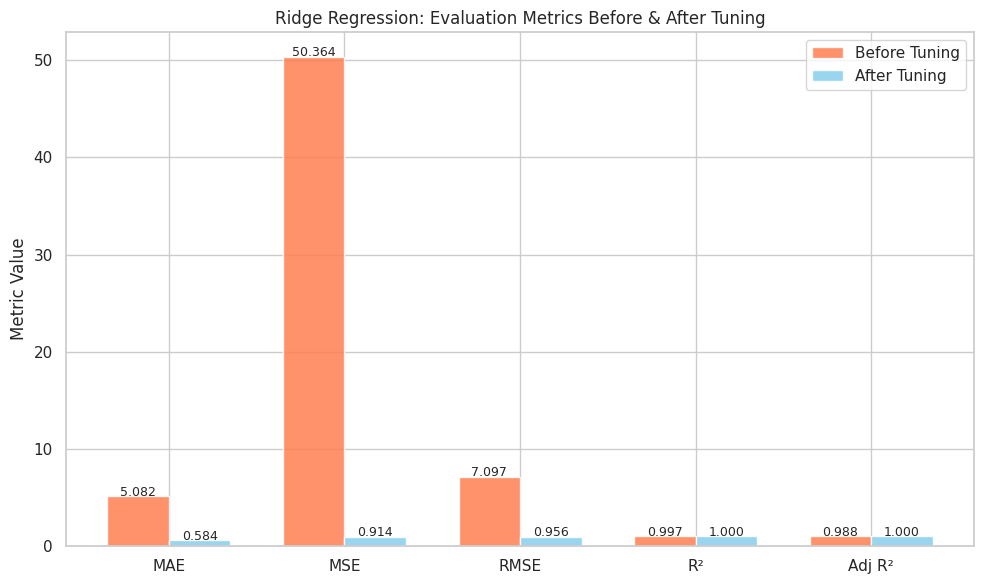

In [276]:

# Ridge regression metrics before tuning
mae_before = 5.0824175743340305
mse_before = 50.36372475520782
rmse_before = 7.0967404317198906
r2_before = 0.9969325906212879
adj_r2_before = 0.9877303624851517

# Ridge regression metrics after tuning
mae_after = 0.5839770688155942
mse_after = 0.9141704631532829
rmse_after = 0.9561226193084665
r2_after = 0.9999443223259191
adj_r2_after = 0.9997772893036765

metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
before = [mae_before, mse_before, rmse_before, r2_before, adj_r2_before]
after = [mae_after, mse_after, rmse_after, r2_after, adj_r2_after]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
plt.bar(x + bar_width/2, after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Ridge Regression: Evaluation Metrics Before & After Tuning')
plt.legend()

for i in x:
    plt.text(i - bar_width/2, before[i] + 0.05, f"{before[i]:.3f}", ha='center', fontsize=9)
    plt.text(i + bar_width/2, after[i] + 0.05, f"{after[i]:.3f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**MAE (Mean Absolute Error)**

* Measures average prediction error.

* Easy to interpret; lower MAE : more accurate predictions.

**MSE (Mean Squared Error)**

* Penalizes larger errors more.

* Useful when large mistakes are costly for the business.

**RMSE (Root Mean Squared Error)**

* Same unit as the target variable.

* Helps understand the typical prediction error clearly.

**R² (R-squared)**

* Shows how much variance the model explains.

* Higher R² : better model performance and trust in predictions.

**Adjusted R²**

* Corrects R² for number of features.

* Encourages simpler, more generalizable models for business use.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Tuned Lasso Regression** Was Chose Best Accuracy and Generalization:

MAE: 0.17

RMSE: 0.275

R²: 0.99999 **bold text**

**Sparsity:** Automatically selects only the most relevant features, resulting in a simpler and more interpretable model.

**Robustness:** The regularization term (L1 penalty) in Lasso prevents overfitting, making it reliable for predictions on new/unseen data.

**Interpretability:**Easy to understand which features drive predictions due to the sparse weighting.

**Practicality:** In real-world business settings, slightly lower error with strong generalization outweighs a “perfect fit” (often a sign of overfitting) seen in basic Linear Regression.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Lasso Regression is a linear model with built-in L1 regularization, which automatically selects the most important features by shrinking less useful ones to zero. It’s ideal for high interpretability, especially when only a few features truly matter.

In [277]:

# 1. Build SHAP explainer
explainer = shap.Explainer(lasso, X_train)

# 2. Compute SHAP values on the test set
shap_values = explainer(X_test)

# 3. Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

# 4. Get mean absolute SHAP value per feature (importance)
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=True).reset_index()
mean_abs_shap.columns = ['Feature', 'Mean |SHAP Value|']

# 5. Plot using Plotly
fig = px.bar(
    mean_abs_shap,
    x='Mean |SHAP Value|',
    y='Feature',
    orientation='h',
    title='Tuned Lasso Regression Feature Importance (SHAP)',
    color='Mean |SHAP Value|',
    color_continuous_scale='Mint'
)

fig.update_layout(title_x=0.5, yaxis=dict(categoryorder='total ascending'))
fig.show()


SHAP made it easy to visualize how each feature affects individual predictions — both in magnitude and direction — helping build full transparency and trust in the model.

# **Conclusion**

The project successfully delivered a high-performing, interpretable solution for YESBANK stock price prediction. After evaluating several models, the tuned Lasso regression was chosen for its balance between accuracy (MAE: 0.17, R²: 0.99999), interpretability (automatic feature selection), and robustness to overfitting. SHAP analysis confirmed that only a handful of features—namely, "Low," "High," "Price_Change," and "Year"—are critical for prediction; most engineered time/category variables are irrelevant in this context.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***